 # LifeSense EMA Missingness Wave 1

In [25]:
# imports and constants
%matplotlib inline
import json
import pickle

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display, HTML
import ipywidgets as widgets


In [2]:
# Code hider, source: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [5]:
# load ids and data

with open("data_pull/ids/wave1_ids.txt", "r") as internal_f:
    wave1_ids = [line.strip() for  line in internal_f.readlines()]

## Data Overview

### Morning EMAs

In [9]:
morn_ema_df = pd.DataFrame()
all_ids = wave1_ids

for pid in all_ids:
    morn_df = pd.read_pickle("data_pull_ema_issues/morning_ema/{}.df".format(pid))
    morn_ema_df = morn_ema_df.append(morn_df, sort=True)

In [10]:
morn_ema_df['timestamp'] = morn_ema_df['timestamp'].astype(int)
morn_ema_df['timezone-offset'] = morn_ema_df['timezone-offset'].astype(int)
morn_ema_df['sleep-quality'] = morn_ema_df['sleep-quality'].astype(int)

morn_ema_df['adj_ts'] = morn_ema_df['timestamp'] + morn_ema_df['timezone-offset']
morn_ema_df['date'] = pd.to_datetime(morn_ema_df['adj_ts'], unit='s').dt.floor('d')
morn_ema_df['pid'] = 'p' + morn_ema_df['source']

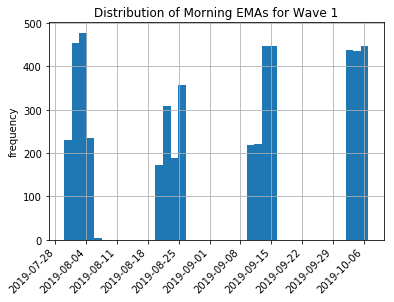

In [41]:
fig, ax = plt.subplots()
morn_ema_df['date'].hist(bins=40, ax=ax)
plt.xticks(rotation='45', ha='right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
ax.set_title("Distribution of Morning EMAs for Wave 1")
plt.ylabel("frequency")
fig.show()

### Morning PHQ8

In [12]:
morn_phq8_df = pd.DataFrame()
all_ids = wave1_ids

for pid in all_ids:
    morn_df = pd.read_pickle("data_pull_ema_issues/morning_phq8/{}.df".format(pid))
    morn_phq8_df = morn_phq8_df.append(morn_df, sort=True)

In [13]:
morn_phq8_df['timestamp'] = morn_phq8_df['timestamp'].astype(int)
morn_phq8_df['timezone-offset'] = morn_phq8_df['timezone-offset'].astype(int)
morn_phq8_df['sleep-quality'] = morn_phq8_df['sleep-quality'].astype(int)

morn_phq8_df['adj_ts'] = morn_phq8_df['timestamp'] + morn_phq8_df['timezone-offset']
morn_phq8_df['date'] = pd.to_datetime(morn_phq8_df['adj_ts'], unit='s').dt.floor('d')
morn_phq8_df['pid'] = 'p' + morn_phq8_df['source']

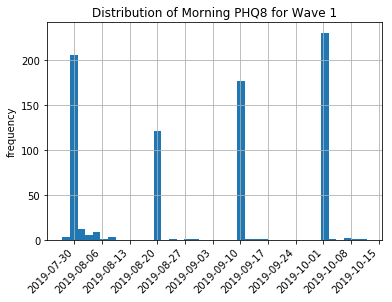

In [39]:
fig, ax = plt.subplots()
morn_phq8_df['date'].hist(bins=40, ax=ax)
plt.xticks(rotation='45', ha='right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
ax.set_title("Distribution of Morning PHQ8 for Wave 1")
plt.ylabel("frequency")
fig.show()

### Evening EMAs

In [26]:
even_ema_df = pd.DataFrame()

for pid in all_ids:
    even_df = pd.read_pickle("data_pull_ema_issues/evening_ema/{}.df".format(pid))
    even_ema_df = even_ema_df.append(even_df, sort=True)

#### "For yesterday" readings

In [27]:
display(even_ema_df['for_yesterday'].value_counts())

False    4381
True      506
Name: for_yesterday, dtype: int64

In [29]:
even_ema_df['timestamp'] = even_ema_df['timestamp'].astype(int)
even_ema_df['timezone-offset'] = even_ema_df['timezone-offset'].astype(int)

even_ema_df['adj_ts'] = even_ema_df['timestamp'] + even_ema_df['timezone-offset']
even_ema_df['date'] = pd.to_datetime(even_ema_df['adj_ts'], unit='s').dt.floor('d')
even_ema_df['pid'] = 'p' + even_ema_df['source']

In [30]:
# adjust for yesterday surveys
even_ema_df['for_yesterday'] = even_ema_df['for_yesterday'].fillna(0)
even_ema_df['for_yesterday'] = even_ema_df['for_yesterday'].astype(int)
even_ema_df['adj_date'] = even_ema_df['date'] - pd.to_timedelta(even_ema_df['for_yesterday'], unit='D')

/home/tliu/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/ticker.py:1437: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.DayLocator'>
  str(type(self)))


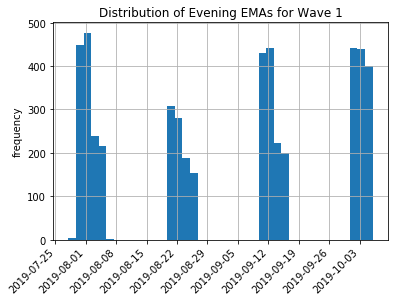

In [38]:
fig, ax = plt.subplots()
even_ema_df['adj_date'].hist(bins=40, ax=ax)
plt.xticks(rotation='45', ha='right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
ax.set_title("Distribution of Evening EMAs for Wave 1")
plt.ylabel("frequency")
fig.show()

In [32]:
even_ema_df['time'] = pd.to_datetime(even_ema_df['adj_ts'], unit='s').dt.round('H').dt.hour

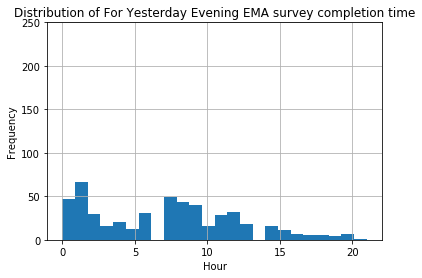

In [35]:
even_ema_df.loc[even_ema_df['for_yesterday'] == 1]['time'].hist(bins=24)
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.ylim(0,250)
plt.title("Distribution of For Yesterday Evening EMA survey completion time")
plt.show()

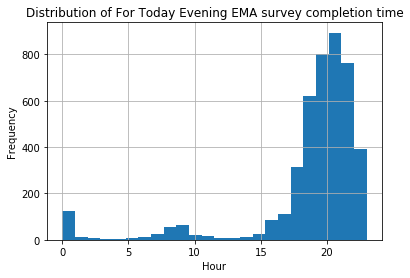

In [34]:
even_ema_df.loc[even_ema_df['for_yesterday'] == 0]['time'].hist(bins=24)
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Distribution of For Today Evening EMA survey completion time")
plt.show()

### Evening PHQ8

In [44]:
even_phq8_df = pd.DataFrame()
all_ids = wave1_ids

for pid in all_ids:
    even_df = pd.read_pickle("data_pull_ema_issues/evening_phq8/{}.df".format(pid))
    even_phq8_df = even_phq8_df.append(even_df, sort=True)

In [45]:
even_phq8_df['timestamp'] = even_phq8_df['timestamp'].astype(int)
even_phq8_df['timezone-offset'] = even_phq8_df['timezone-offset'].astype(int)
#even_phq8_df['sleep-quality'] = even_phq8_df['sleep-quality'].astype(int)

even_phq8_df['adj_ts'] = even_phq8_df['timestamp'] + even_phq8_df['timezone-offset']
even_phq8_df['date'] = pd.to_datetime(even_phq8_df['adj_ts'], unit='s').dt.floor('d')
even_phq8_df['pid'] = 'p' + even_phq8_df['source']

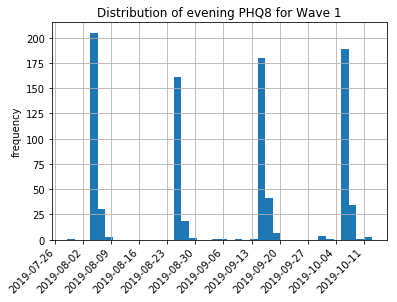

In [46]:
fig, ax = plt.subplots()
even_phq8_df['date'].hist(bins=40, ax=ax)
plt.xticks(rotation='45', ha='right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
ax.set_title("Distribution of evening PHQ8 for Wave 1")
plt.ylabel("frequency")
fig.show()

## Completed EMA Statistics

In [55]:
def get_completion_stats(df, start_date, end_date):
    """
    Returns the count as well as the unique number of respondents in each date range
    """
    sel_df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]
    count = sel_df.shape[0]
    n_unique = sel_df['pid'].unique().shape[0]
    
    return count, n_unique

In [72]:
dates = [
    ('07-30-2019', '08-05-2019'),
    ('08-20-2019', '08-26-2019'),
    ('09-10-2019', '09-16-2019'),
    ('10-01-2019', '10-07-2019'),
]

dfs = [
    (morn_ema_df, 'morn_ema'),
    (even_ema_df, 'even_ema'),
    (morn_phq8_df, 'morn_ema_phq8'),
    (even_phq8_df, 'even_ema_phq8')
]

In [73]:
ema_count_df = pd.DataFrame(columns=dates)

ema_count_idx = []
for _, name in dfs:
    ema_count_idx.append(name + '_count')
    ema_count_idx.append(name + '_n_unique')
    

ema_count_df['idx'] = ema_count_idx
ema_count_df = ema_count_df.set_index('idx')

for date_tup in dates:
    start_date = date_tup[0]
    end_date = date_tup[1]
    col = []
    for df, name in dfs:
        count, n_unique = get_completion_stats(df, start_date, end_date)
        col.append(count)
        col.append(n_unique)
        
    ema_count_df[date_tup] = col
    

In [74]:
ema_count_df

,"(07-30-2019, 08-05-2019)","(08-20-2019, 08-26-2019)","(09-10-2019, 09-16-2019)","(10-01-2019, 10-07-2019)"
idx,,,,
morn_ema_count,1398,1027,1336,1320
morn_ema_n_unique,258,231,247,246
even_ema_count,1381,929,1293,1281
even_ema_n_unique,254,233,246,246
morn_ema_phq8_count,220,122,179,232
morn_ema_phq8_n_unique,212,122,179,232
even_ema_phq8_count,205,161,182,194
even_ema_phq8_n_unique,205,161,182,191
